In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015 = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              4081 non-null   int64  
 1   pohlavi_kod             4081 non-null   int64  
 2   je_cech                 4081 non-null   int64  
 3   datum_zahajeni          4081 non-null   int64  
 4   rok_maturity            4081 non-null   int64  
 5   maturita_nastup_rozdil  4081 non-null   int64  
 6   gymnazium               4081 non-null   int64  
 7   praha                   4081 non-null   int64  
 8   scio                    4081 non-null   int64  
 9   olym                    4081 non-null   int64  
 10  zkouska                 4081 non-null   int64  
 11  prominuti               4081 non-null   int64  
 12  dostudoval_uspesne      4081 non-null   int64  
 13  BI-PA1                  3918 non-null   float64
 14  BI-PAI                  3894 non-null   

In [4]:
matrix_bak_2015.mean()

studium_id                1.467385e+07
pohlavi_kod               1.261946e-01
je_cech                   7.757902e-01
datum_zahajeni            2.017257e+03
rok_maturity              2.016399e+03
maturita_nastup_rozdil    8.576329e-01
gymnazium                 5.449645e-01
praha                     6.508209e-01
scio                      9.605489e-02
olym                      1.021808e-01
zkouska                   3.479539e-02
prominuti                 2.719922e-02
dostudoval_uspesne        2.038716e-01
BI-PA1                    3.201506e+00
BI-PAI                    2.756292e+00
BI-CAO                    1.959115e+00
BI-PS1                    3.093703e+00
BI-MLO                    2.988975e+00
BI-ZMA                    3.206211e+00
BI-PA2                    2.968569e+00
BI-DBS                    2.548092e+00
BI-SAP                    2.444016e+00
BI-LIN                    3.248950e+00
BI-AG1                    2.840164e+00
BI-AAG                    2.787430e+00
BI-ZDM                   

## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak_2015 = matrix_bak_2015.set_index(['studium_id'])

### Přidání příznaků

In [6]:
matrix_bak_2015['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].mean(axis=1)

In [7]:
matrix_bak_2015.mean()

pohlavi_kod                  0.126195
je_cech                      0.775790
datum_zahajeni            2017.256555
rok_maturity              2016.398922
maturita_nastup_rozdil       0.857633
gymnazium                    0.544964
praha                        0.650821
scio                         0.096055
olym                         0.102181
zkouska                      0.034795
prominuti                    0.027199
dostudoval_uspesne           0.203872
BI-PA1                       3.201506
BI-PAI                       2.756292
BI-CAO                       1.959115
BI-PS1                       3.093703
BI-MLO                       2.988975
BI-ZMA                       3.206211
BI-PA2                       2.968569
BI-DBS                       2.548092
BI-SAP                       2.444016
BI-LIN                       3.248950
BI-AG1                       2.840164
BI-AAG                       2.787430
BI-ZDM                       2.900637
BI-OSY                       2.687002
BI-PSI      

### Doplnění NaN hodnot

##### Doplnění pomocí KNNImputer

In [8]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
matrix_bak_2015 = pd.DataFrame(imputer.fit_transform(matrix_bak_2015), index=matrix_bak_2015.index, columns=matrix_bak_2015.columns)

In [9]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pohlavi_kod             4081 non-null   float64
 1   je_cech                 4081 non-null   float64
 2   datum_zahajeni          4081 non-null   float64
 3   rok_maturity            4081 non-null   float64
 4   maturita_nastup_rozdil  4081 non-null   float64
 5   gymnazium               4081 non-null   float64
 6   praha                   4081 non-null   float64
 7   scio                    4081 non-null   float64
 8   olym                    4081 non-null   float64
 9   zkouska                 4081 non-null   float64
 10  prominuti               4081 non-null   float64
 11  dostudoval_uspesne      4081 non-null   float64
 12  BI-PA1                  4081 non-null   float64
 13  BI-PAI                  4081 non-null   float64
 14  BI-CAO                  4081 

#### Zaokrouhlení doplněných hodnot

In [10]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [11]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [12]:
matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].applymap(custom_round)

In [13]:
matrix_bak_2015

pohlavi_kod  je_cech  datum_zahajeni  rok_maturity  \
studium_id                                                       
19374606            0.0      1.0          2021.0        2009.0   
12375406            0.0      1.0          2015.0        2009.0   
11736906            0.0      1.0          2015.0        2009.0   
12032306            0.0      1.0          2015.0        2007.0   
15613006            0.0      1.0          2018.0        2009.0   
12948006            1.0      1.0          2016.0        2010.0   
11703806            0.0      1.0          2015.0        2010.0   
12967806            0.0      1.0          2016.0        2010.0   
11738606            0.0      0.0          2015.0        2010.0   
11719706            0.0      1.0          2015.0        2010.0   
11675306            0.0      0.0          2015.0        2010.0   
12987806            0.0      1.0          2016.0        2010.0   
11743906            0.0      1.0          2015.0        2010.0   
13016006            0.0      1.0          2016.0        2010.0   
12036006            0.0      1.0          2015.0        2010.0   
13512306            0.0      1.0          2016.0        2011.0   
12987706            0.0      1.0          2016.0        2010.0   
11678106            0.0      1.0          2015.0        2010.0   
13518506            0.0      1.0          2016.0        2011.0   
14256606            0.0      0.0          2017.0        2011.0   
11727206            0.0      1.0          2015.0        2011.0   
11736306            0.0      1.0          2015.0        2011.0   
12967906            0.0      1.0          2016.0        2011.0   
11703506            0.0      1.0          2015.0        2011.0   
13010106            0.0      1.0          2016.0        2011.0   
14800306            0.0      1.0          2017.0        2011.0   
11744706            1.0      1.0          2015.0        2011.0   
11696406            1.0      0.0          2015.0        2010.0   
12973406            0.0      1.0          2016.0        2011.0   
11737806            0.0      1.0          2015.0        2011.0   
12035506            1.0      0.0          2015.0        2011.0   
13512006            0.0      1.0          2016.0        2011.0   
12964406            0.0      1.0          2016.0        2011.0   
12994106            1.0      1.0          2016.0        2011.0   
11742506            0.0      1.0          2015.0        2011.0   
11712706            0.0      1.0          2015.0        2011.0   
13518806            0.0      1.0          2016.0        2011.0   
11735606            0.0      1.0          2015.0        2011.0   
13518606            0.0      1.0          2016.0        2011.0   
15586306            0.0      1.0          2018.0        2011.0   
13519806            0.0      1.0          2016.0        2011.0   
11686106            0.0      1.0          2015.0        2012.0   
11692606            0.0      1.0          2015.0        2012.0   
13013306            0.0      1.0          2016.0        2012.0   
11713906            0.0      1.0          2015.0        2012.0   
12978506            0.0      1.0          2016.0        2012.0   
14283706            0.0      1.0          2017.0        2012.0   
11736706            0.0      1.0          2015.0        2012.0   
11676006            0.0      1.0          2015.0        2012.0   
12033706            0.0      1.0          2015.0        2012.0   
12964506            0.0      1.0          2016.0        2012.0   
16724706            0.0      1.0          2019.0        2012.0   
12954706            0.0      1.0          2016.0        2012.0   
12034706            0.0      0.0          2015.0        2012.0   
12959206            0.0      1.0          2016.0        2012.0   
14803806            0.0      1.0          2017.0        2012.0   
11733706            0.0      1.0          2015.0        2012.0   
11707706            0.0      1.0          2015.0        2012.0   
12032006            0.0      1.0          2015.0    

### Pomocné promenné

In [14]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = ['BI-DPR']
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [15]:
means = {'BI-PA1':3, 'BI-PAI':3, 'BI-CAO':2, 'BI-PS1':3, 'BI-MLO':3, 'BI-ZMA':3,
        'BI-PA2':3, 'BI-DBS':2.5, 'BI-SAP':2.5, 'BI-LIN':3,
        'BI-AAG':3, 'BI-ZDM':3, 'BI-AG1':3,
        'BI-OSY':2.5, 'BI-PSI':2.5, 'BI-BEZ':2.5,
        'BI-PST':2,
        'BI-DPR':1.5,
        'BI-SI1.2':2, 'BI-EMP':2
        }

prumer_mean = 3

### Nastavení target proměnné na nominální

In [16]:
dostudoval_uspesne_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
matrix_bak_2015['dostudoval_uspesne'] = matrix_bak_2015['dostudoval_uspesne'].astype(dostudoval_uspesne_category)

In [17]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pohlavi_kod             4081 non-null   float64 
 1   je_cech                 4081 non-null   float64 
 2   datum_zahajeni          4081 non-null   float64 
 3   rok_maturity            4081 non-null   float64 
 4   maturita_nastup_rozdil  4081 non-null   float64 
 5   gymnazium               4081 non-null   float64 
 6   praha                   4081 non-null   float64 
 7   scio                    4081 non-null   float64 
 8   olym                    4081 non-null   float64 
 9   zkouska                 4081 non-null   float64 
 10  prominuti               4081 non-null   float64 
 11  dostudoval_uspesne      4081 non-null   category
 12  BI-PA1                  4081 non-null   float64 
 13  BI-PAI                  4081 non-null   float64 
 14  BI-CAO       

### Nastavení atributů na kategorické - ordinální

In [18]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4, 0], ordered=True)
# BI-PA1
matrix_bak_2015['BI-PA1'] = matrix_bak_2015['BI-PA1'].astype(grades_category)
# BI-PAI
matrix_bak_2015['BI-PAI'] = matrix_bak_2015['BI-PAI'].astype(grades_category)
# BI-CAO
matrix_bak_2015['BI-CAO'] = matrix_bak_2015['BI-CAO'].astype(grades_category)
# BI-PS1
matrix_bak_2015['BI-PS1'] = matrix_bak_2015['BI-PS1'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-MLO'] = matrix_bak_2015['BI-MLO'].astype(grades_category)
# BI-ZMA
matrix_bak_2015['BI-ZMA'] = matrix_bak_2015['BI-ZMA'].astype(grades_category)
# BI-PA2
matrix_bak_2015['BI-PA2'] = matrix_bak_2015['BI-PA2'].astype(grades_category)
# BI-DBS
matrix_bak_2015['BI-DBS'] = matrix_bak_2015['BI-DBS'].astype(grades_category)
# BI-SAP
matrix_bak_2015['BI-SAP'] = matrix_bak_2015['BI-SAP'].astype(grades_category)
# BI-LIN
matrix_bak_2015['BI-LIN'] = matrix_bak_2015['BI-LIN'].astype(grades_category)
# BI-AG1
matrix_bak_2015['BI-AG1'] = matrix_bak_2015['BI-AG1'].astype(grades_category)
# BI-AAG
matrix_bak_2015['BI-AAG'] = matrix_bak_2015['BI-AAG'].astype(grades_category)
# BI-ZDM
matrix_bak_2015['BI-ZDM'] = matrix_bak_2015['BI-ZDM'].astype(grades_category)
# BI-OSY
matrix_bak_2015['BI-OSY'] = matrix_bak_2015['BI-OSY'].astype(grades_category)
# BI-PSI
matrix_bak_2015['BI-PSI'] = matrix_bak_2015['BI-PSI'].astype(grades_category)
# BI-BEZ
matrix_bak_2015['BI-BEZ'] = matrix_bak_2015['BI-BEZ'].astype(grades_category)
# BI-PST
matrix_bak_2015['BI-PST'] = matrix_bak_2015['BI-PST'].astype(grades_category)
# BI-SI1.2
matrix_bak_2015['BI-SI1.2'] = matrix_bak_2015['BI-SI1.2'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-EMP'] = matrix_bak_2015['BI-EMP'].astype(grades_category)
# BI-DPR
matrix_bak_2015['BI-DPR'] = matrix_bak_2015['BI-DPR'].astype(grades_category)

In [19]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pohlavi_kod             4081 non-null   float64 
 1   je_cech                 4081 non-null   float64 
 2   datum_zahajeni          4081 non-null   float64 
 3   rok_maturity            4081 non-null   float64 
 4   maturita_nastup_rozdil  4081 non-null   float64 
 5   gymnazium               4081 non-null   float64 
 6   praha                   4081 non-null   float64 
 7   scio                    4081 non-null   float64 
 8   olym                    4081 non-null   float64 
 9   zkouska                 4081 non-null   float64 
 10  prominuti               4081 non-null   float64 
 11  dostudoval_uspesne      4081 non-null   category
 12  BI-PA1                  4081 non-null   category
 13  BI-PAI                  4081 non-null   category
 14  BI-CAO       

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [20]:
Xdata = matrix_bak_2015.drop(columns='dostudoval_uspesne')
ydata = matrix_bak_2015.dostudoval_uspesne

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(4081, 32)

(4081,)

trénovací data


(3264, 32)

(3264,)

testovací data


(817, 32)

(817,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [22]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [23]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [24]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}

0.899725 (+/-0.016114) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.905161 (+/-0.013275) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.915391 (+/-0.012994) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.913924 (+/-0.027044) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.918248 (+/-0.014238) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.900522 (+/-0.019141) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.909849 (+/-0.017327) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.911718 (+/-0.029916) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.920971 (+/-0.012919) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.925177 (+/-0.022131) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [25]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.979473
accuracy score (test): 0.968176


In [26]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
31                  prumer            0.787399
21                  BI-AG1            0.095260
4   maturita_nastup_rozdil            0.027419
20                  BI-LIN            0.023784
28                  BI-DPR            0.017828
2           datum_zahajeni            0.016831
24                  BI-OSY            0.008846
23                  BI-ZDM            0.008843
27                  BI-PST            0.005923
18                  BI-DBS            0.004936
11                  BI-PA1            0.002929
22                  BI-AAG            0.000000
26                  BI-BEZ            0.000000
25                  BI-PSI            0.000000
29                BI-SI1.2            0.000000
30                  BI-EMP            0.000000
19                  BI-SAP            0.000000
0              pohlavi_kod            0.000000
17                  BI-PA2            0.000000
1                  je_cech            0.000000
15                  BI-MLO            0.000000
14                  BI-PS1            0.000000
13                  BI-CAO            0.000000
12                  BI-PAI            0.000000
10               prominuti            0.000000
9                  zkouska            0.000000
8                     olym            0.000000
7                     scio            0.000000
6                    praha            0.000000
5                gymnazium            0.000000
3             rok_maturity            0.000000
16                  BI-ZMA            0.000000

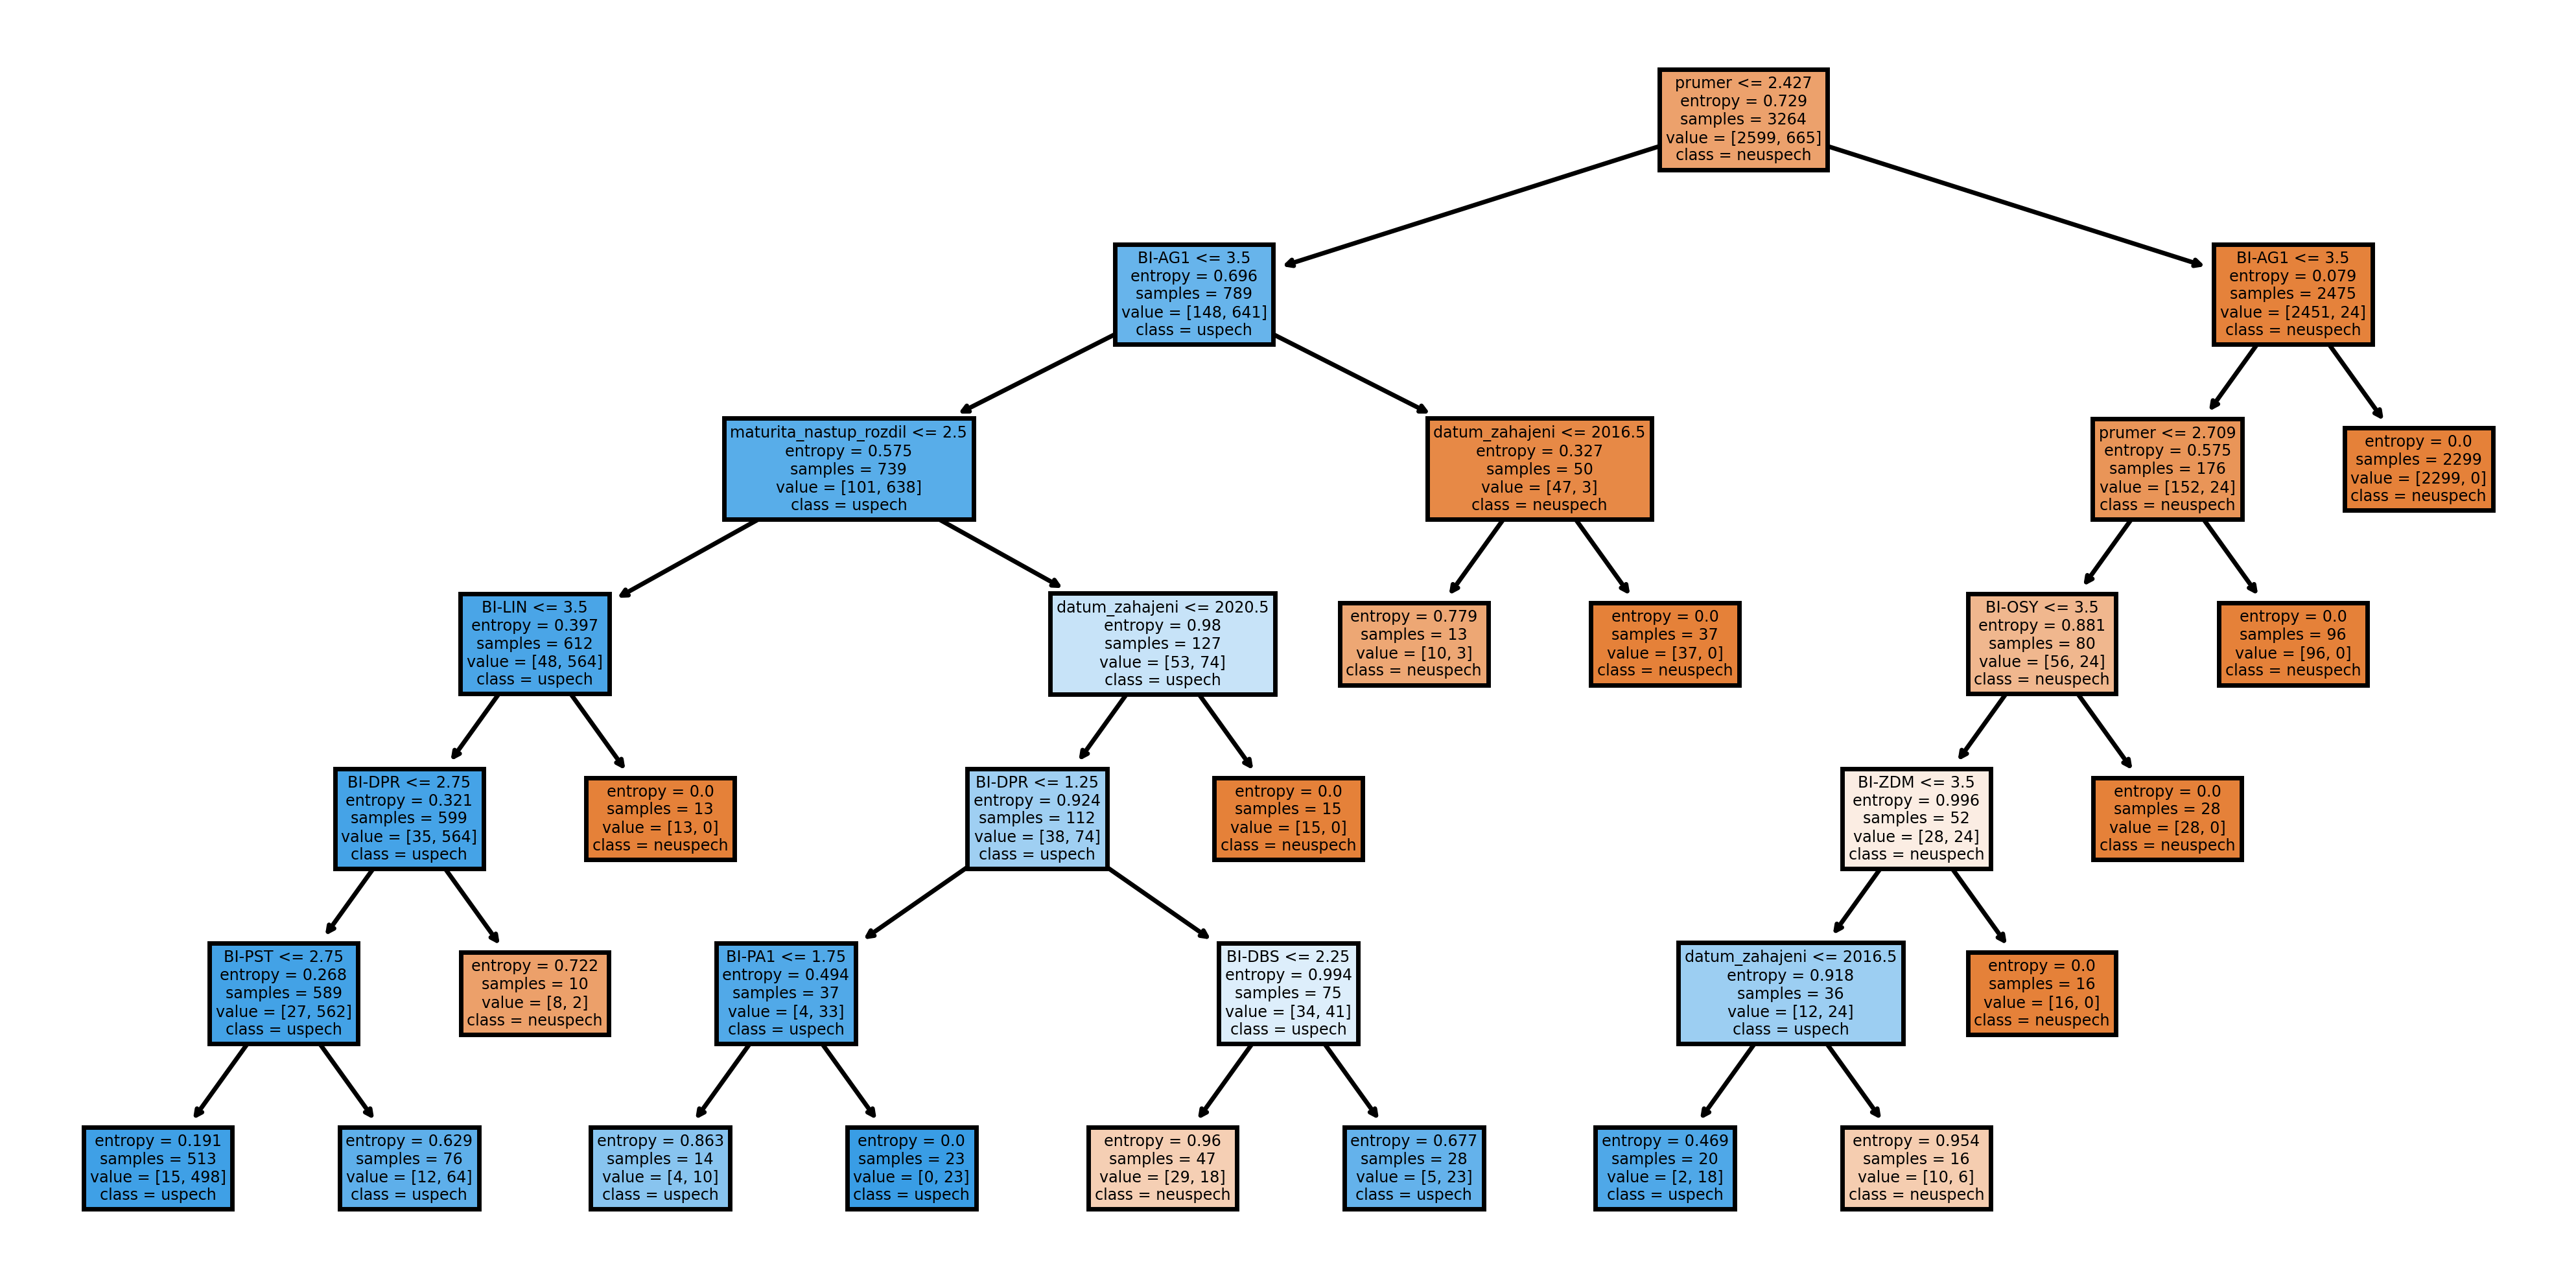

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1.png')

#### Random forest

In [28]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [29]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 15}

0.908571 (+/-0.020902) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.916542 (+/-0.033369) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.916088 (+/-0.026290) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.917433 (+/-0.015791) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.916187 (+/-0.017166) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.918649 (+/-0.023447) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.920475 (+/-0.023216) for {'criterion': 'gini', 'max_depth': 2, 

In [30]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.970588
accuracy score (test): 0.971848


In [31]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
23                  BI-ZDM            0.276415
21                  BI-AG1            0.227121
31                  prumer            0.173347
17                  BI-PA2            0.062293
27                  BI-PST            0.057014
11                  BI-PA1            0.048305
24                  BI-OSY            0.043627
26                  BI-BEZ            0.042006
22                  BI-AAG            0.012733
28                  BI-DPR            0.011501
20                  BI-LIN            0.011214
14                  BI-PS1            0.010031
12                  BI-PAI            0.004666
16                  BI-ZMA            0.004240
25                  BI-PSI            0.003635
2           datum_zahajeni            0.003575
4   maturita_nastup_rozdil            0.002747
29                BI-SI1.2            0.002354
8                     olym            0.001814
18                  BI-DBS            0.001361
13                  BI-CAO            0.000000
5                gymnazium            0.000000
30                  BI-EMP            0.000000
3             rok_maturity            0.000000
6                    praha            0.000000
15                  BI-MLO            0.000000
7                     scio            0.000000
9                  zkouska            0.000000
19                  BI-SAP            0.000000
10               prominuti            0.000000
1                  je_cech            0.000000
0              pohlavi_kod            0.000000

#### SVM

In [32]:
param_grid_svm = {
    'kernel':['linear', 'rbf'],
    'gamma':['auto', 'scale'],
    'C':[100, 10, 1, 0.1]
}
param_comb_svm = ParameterGrid(param_grid_svm)

In [33]:
svc_f1 = get_best_parameters(param_grid_svm, SVC)

Best hyper-parameters are: 
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

0.932426 (+/-0.032913) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.947510 (+/-0.034181) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.932426 (+/-0.032913) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.935759 (+/-0.029096) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.954087 (+/-0.032415) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.935759 (+/-0.029096) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.937155 (+/-0.011659) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.952499 (+/-0.019333) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.937155 (+/-0.011659) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.937873 (+/-0.004948) for {'C': 0.1, 'gamma': 'aut

In [34]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svc_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svc_f1.predict(Xtest))))

accuracy score (train): 0.997855
accuracy score (test): 0.979192


#### Adaboost

In [35]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [36]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.30000000000000004, 'n_estimators': 40}

0.908377 (+/-0.028693) for {'learning_rate': 0.1, 'n_estimators': 5}
0.929047 (+/-0.016636) for {'learning_rate': 0.1, 'n_estimators': 10}
0.928264 (+/-0.014908) for {'learning_rate': 0.1, 'n_estimators': 15}
0.932776 (+/-0.016161) for {'learning_rate': 0.1, 'n_estimators': 20}
0.940312 (+/-0.019597) for {'learning_rate': 0.1, 'n_estimators': 25}
0.947576 (+/-0.029225) for {'learning_rate': 0.1, 'n_estimators': 30}
0.951770 (+/-0.027398) for {'learning_rate': 0.1, 'n_estimators': 35}
0.956390 (+/-0.026843) for {'learning_rate': 0.1, 'n_estimators': 40}
0.966897 (+/-0.017326) for {'learning_rate': 0.1, 'n_estimators': 45}
0.918234 (+/-0.011481) for {'learning_rate': 0.2, 'n_estimators': 5}
0.926761 (+/-0.025265) for {'learning_rate': 0.2, 'n_estimators': 10}
0.935133 (+/-0.016305) for {'learning_rate': 0.2, 'n_estimators': 15}
0.945441 (+/-0.022598) for {'learning_rate': 0.2, 'n_estimators': 20}
0.95

In [37]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.991422
accuracy score (test): 0.986536


In [38]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
4   maturita_nastup_rozdil               0.150
28                  BI-DPR               0.125
2           datum_zahajeni               0.100
27                  BI-PST               0.100
31                  prumer               0.075
21                  BI-AG1               0.075
19                  BI-SAP               0.075
30                  BI-EMP               0.050
23                  BI-ZDM               0.050
20                  BI-LIN               0.025
11                  BI-PA1               0.025
12                  BI-PAI               0.025
24                  BI-OSY               0.025
22                  BI-AAG               0.025
3             rok_maturity               0.025
17                  BI-PA2               0.025
18                  BI-DBS               0.025
29                BI-SI1.2               0.000
26                  BI-BEZ               0.000
25                  BI-PSI               0.000
0              pohlavi_kod               0.000
1                  je_cech               0.000
15                  BI-MLO               0.000
14                  BI-PS1               0.000
13                  BI-CAO               0.000
10               prominuti               0.000
9                  zkouska               0.000
8                     olym               0.000
7                     scio               0.000
6                    praha               0.000
5                gymnazium               0.000
16                  BI-ZMA               0.000

#### Xgboost

In [39]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [40]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 4}

0.965384 (+/-0.012532) for {'eta': 0.1, 'max_depth': 3}
0.967491 (+/-0.022730) for {'eta': 0.1, 'max_depth': 4}
0.963012 (+/-0.006711) for {'eta': 0.1, 'max_depth': 5}
0.962265 (+/-0.010420) for {'eta': 0.1, 'max_depth': 6}
0.960681 (+/-0.019353) for {'eta': 0.1, 'max_depth': 7}
0.964748 (+/-0.014716) for {'eta': 0.2, 'max_depth': 3}
0.961502 (+/-0.014218) for {'eta': 0.2, 'max_depth': 4}
0.959359 (+/-0.011217) for {'eta': 0.2, 'max_depth': 5}
0.959253 (+/-0.022708) for {'eta': 0.2, 'max_depth': 6}
0.957948 (+/-0.014286) for {'eta': 0.2, 'max_depth': 7}
0.963206 (+/-0.016040) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.955048 (+/-0.010696) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.959474 (+/-0.012186) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.954038 (+/-0.021853) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.954348 (+/-0.015068) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.958763 (+/-0.010734)

In [41]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.995711
accuracy score XGBoost (val): 0.986536


In [42]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [43]:
feat_imp

BI-DPR                    55.0
BI-AAG                    50.0
BI-AG1                    47.0
prumer                    38.0
datum_zahajeni            37.0
BI-LIN                    34.0
BI-OSY                    33.0
BI-PST                    31.0
maturita_nastup_rozdil    31.0
BI-PA1                    30.0
BI-ZDM                    30.0
BI-PA2                    29.0
rok_maturity              25.0
BI-EMP                    25.0
BI-ZMA                    25.0
BI-SAP                    21.0
BI-DBS                    20.0
BI-PSI                    15.0
BI-PS1                    13.0
BI-BEZ                     8.0
BI-MLO                     6.0
BI-SI1.2                   6.0
BI-CAO                     4.0
pohlavi_kod                3.0
BI-PAI                     2.0
gymnazium                  2.0
praha                      1.0
dtype: float64

#### MLP

In [44]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [45]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.873468
accuracy score mlp (val): 0.860465


#### Lineární regrese

In [46]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [47]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.1905337699725343
RMSE reg (test): 0.2033608692774133


#### kNN

In [48]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [49]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

0.925339 (+/-0.008938) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.925339 (+/-0.008938) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.923868 (+/-0.029482) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.923868 (+/-0.029482) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.925130 (+/-0.028960) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.925339 (+/-0.008938) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.923641 (+/-0.028901) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.923094 (+/-0.029203) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.923776 (+/-0.029891) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.925109 (+/-0.031296) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.923356 (+/-0.027183) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.923356 (+/-0.027183) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.92

In [50]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.975797
accuracy score knn (val): 0.968176


## Testování po semestrech

### Doplnění 0

#### Pouze nepředmětové příznaky

In [51]:
Xtest_0 = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0.loc[:, course] = 0
Xtest_0.loc[:, 'prumer'] = 5

#### 1. semestr

In [52]:
Xtest_1 = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1.loc[:, course] = 0

Xtest_1.loc[:, 'prumer'] = 5

#### První dva semestry

In [53]:
Xtest_2 = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2.loc[:, course] = 0
    
Xtest_2.loc[:, 'prumer'] = 5

#### První tři semestry

In [54]:
Xtest_3 = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3.loc[:, course] = 0
    
Xtest_3.loc[:, 'prumer'] = 5

#### První čtyři semestry 

In [55]:
Xtest_4 = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4.loc[:, course] = 0
    
Xtest_4.loc[:, 'prumer'] = 5

#### Prvních pět semestrů

In [56]:
Xtest_5 = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5.loc[:, course] = 0
    
Xtest_5.loc[:, 'prumer'] = 5

#### Všechny semestry bez SI1.2 a EMP

In [57]:
Xtest_6 = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6.loc[:, course] = 0
    
Xtest_6.loc[:, 'prumer'] = 5

### Doplnění průměrem

#### Pouze nepředmětové příznaky

In [58]:
Xtest_0_mean = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0_mean.loc[:, course] = means[course]
Xtest_0_mean.loc[:, 'prumer'] = prumer_mean

#### První semestr

In [59]:
Xtest_1_mean = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1_mean.loc[:, course] = means[course]

Xtest_1_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-ZMA'].mean(axis=1)
Xtest_1_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První dva semestry

In [60]:
Xtest_2_mean = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2_mean.loc[:, course] = means[course]
    
Xtest_2_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-LIN'].mean(axis=1)
Xtest_2_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První tři semestry

In [61]:
Xtest_3_mean = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3_mean.loc[:, course] = means[course]
    
Xtest_3_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-ZDM'].mean(axis=1)
Xtest_3_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První čtyři semestry 

In [62]:
Xtest_4_mean = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4_mean.loc[:, course] = means[course]
    
Xtest_4_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-BEZ'].mean(axis=1)
Xtest_4_mean['prumer'].fillna(prumer_mean, inplace=True)

#### Prvních pět semestrů

In [63]:
Xtest_5_mean = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5_mean.loc[:, course] = means[course]
    
Xtest_5_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-PST'].mean(axis=1)
Xtest_5_mean['prumer'].fillna(prumer_mean, inplace=True)

#### Všechny semestry bez SI1.2 a EMP

In [64]:
Xtest_6_mean = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6_mean.loc[:, course] = means[course]
    
Xtest_6_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-PST'].mean(axis=1)
Xtest_6_mean['prumer'].fillna(prumer_mean, inplace=True)

## Výsledky

In [65]:
results = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

results_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

In [66]:
results_reg = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_reg_mean = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])

### Linearní regrese měřena pomocí RMSE

#### Doplněno 0

In [67]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):   
    results_reg.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test[i]), np.array(ytest))), 3)

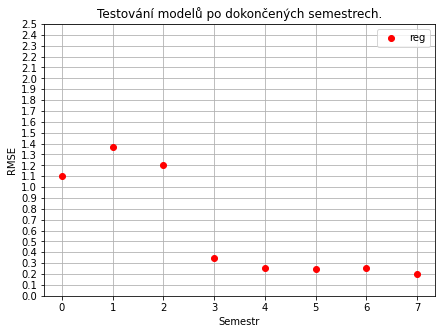

In [68]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg['reg'].index
yreg = results_reg['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.plot(xreg, yreg, 'o', color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [69]:
results_reg

reg
0  1.104
1  1.366
2  1.204
3  0.346
4   0.26
5  0.246
6  0.256
7  0.203

#### Doplněno průměrem

In [70]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_reg_mean.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test_mean[i]), np.array(ytest))), 3)

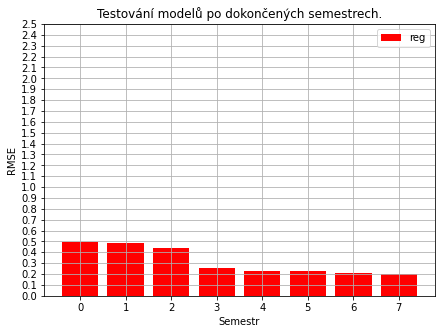

In [71]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg_mean['reg'].index
yreg = results_reg_mean['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.bar(xreg, yreg, color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [72]:
results_reg_mean

reg
0  0.492
1  0.488
2  0.442
3  0.259
4  0.232
5  0.224
6   0.21
7  0.203

## Ostatní modely
### Měřeno accuracy_score

In [73]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test[i])), 3)
    results.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test[i])), 3)
    results.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test[i])), 3)
    results.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test[i])), 3)
    results.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test[i])), 3)
    results.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test[i])), 3)

In [74]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test_mean[i])), 3)

#### Po doplnění 0

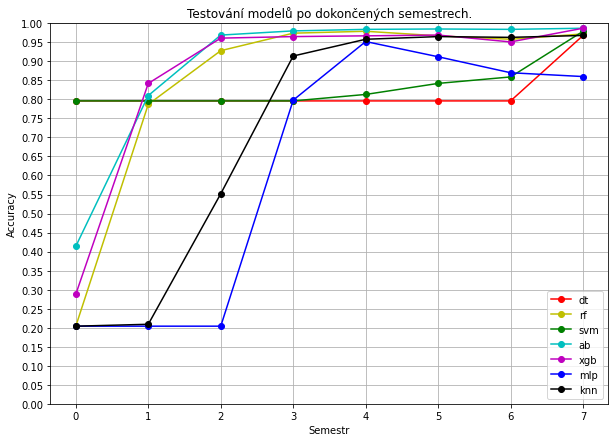

In [76]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results['dt'].index
ydt = results['dt'].values

xrf = results['rf'].index
yrf = results['rf'].values

xsvm = results['svm'].index
ysvm = results['svm'].values

xab = results['ab'].index
yab = results['ab'].values

xxgb = results['xgb'].index
yxgb = results['xgb'].values

xmlp = results['mlp'].index
ymlp = results['mlp'].values

xknn = results['knn'].index
yknn = results['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

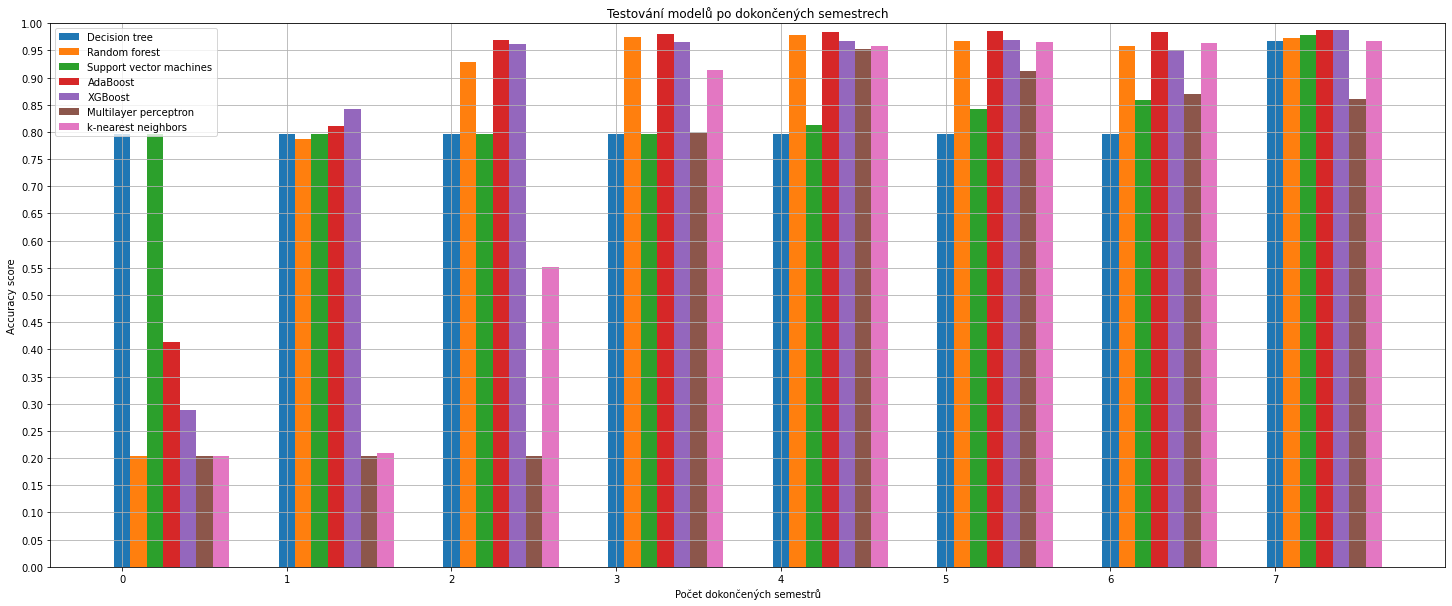

In [77]:
labels = np.array(results.index)

ydt = results['dt'].values

yrf = results['rf'].values

ysvm = results['svm'].values

yab = results['ab'].values

yxgb = results['xgb'].values

ymlp = results['mlp'].values

yknn = results['knn'].values

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , ydt, width, label='Decision tree')
rects_rf = ax.bar(x + width, yrf, width, label='Random forest')
rects_svm = ax.bar(x + width * 2, ysvm, width, label='Support vector machines')
rects_ab = ax.bar(x + width * 3, yab, width, label='AdaBoost')
rects_xgb = ax.bar(x + width * 4, yxgb, width, label='XGBoost')
rects_mlp = ax.bar(x + width * 5, ymlp, width, label='Multilayer perceptron')
rects_knn = ax.bar(x + width * 6, yknn, width, label='k-nearest neighbors')

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Počet dokončených semestrů')
ax.set_title('Testování modelů po dokončených semestrech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [78]:
results

dt     rf    svm     ab    xgb    mlp    knn
0  0.796  0.204  0.796  0.414  0.288  0.204  0.204
1  0.796  0.787  0.796   0.81  0.842  0.204  0.209
2  0.796  0.928  0.796  0.969  0.961  0.204  0.552
3  0.796  0.974  0.796   0.98  0.965  0.798  0.914
4  0.796  0.979  0.813  0.984  0.967  0.952  0.958
5  0.796  0.967  0.842  0.985  0.969  0.912  0.965
6  0.796  0.958  0.859  0.984  0.951   0.87  0.963
7  0.968  0.972  0.979  0.987  0.987   0.86  0.968

#### Po doplněni průměrem

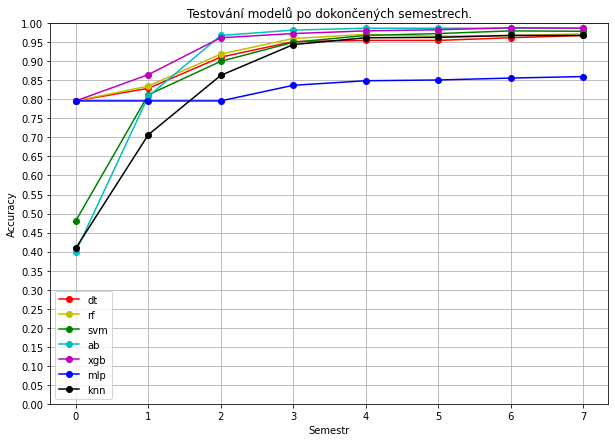

In [87]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean['dt'].index
ydt = results_mean['dt'].values

xrf = results_mean['rf'].index
yrf = results_mean['rf'].values

xsvm = results_mean['svm'].index
ysvm = results_mean['svm'].values

xab = results_mean['ab'].index
yab = results_mean['ab'].values

xxgb = results_mean['xgb'].index
yxgb = results_mean['xgb'].values

xmlp = results_mean['mlp'].index
ymlp = results_mean['mlp'].values

xknn = results_mean['knn'].index
yknn = results_mean['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [80]:
results_mean

dt     rf    svm     ab    xgb    mlp    knn
0  0.796  0.796  0.481    0.4  0.796  0.796  0.409
1  0.829  0.835  0.812  0.808  0.865  0.796  0.707
2  0.911  0.919    0.9  0.968  0.962  0.796  0.863
3  0.952   0.96   0.95  0.982  0.973  0.837  0.944
4  0.955  0.971  0.968  0.987   0.98  0.849  0.962
5  0.955  0.966  0.973  0.987  0.983  0.851  0.963
6  0.962  0.968   0.98  0.987  0.988  0.856  0.968
7  0.968  0.972  0.979  0.987  0.987   0.86  0.968

### Měřeno f1_score

In [81]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

In [82]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_mean_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

#### Po doplnění 0

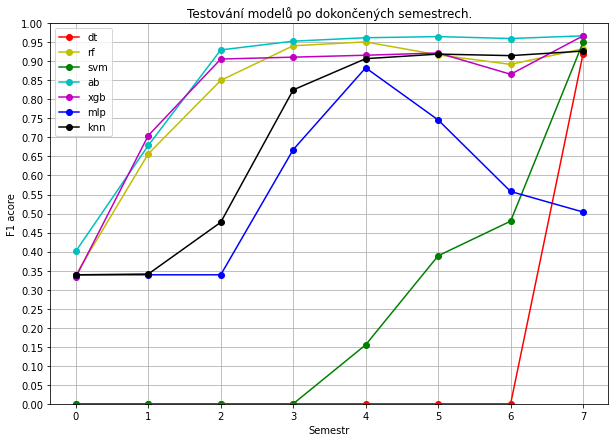

In [88]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_f1['dt'].index
ydt = results_f1['dt'].values

xrf = results_f1['rf'].index
yrf = results_f1['rf'].values

xsvm = results_f1['svm'].index
ysvm = results_f1['svm'].values

xab = results_f1['ab'].index
yab = results_f1['ab'].values

xxgb = results_f1['xgb'].index
yxgb = results_f1['xgb'].values

xmlp = results_f1['mlp'].index
ymlp = results_f1['mlp'].values

xknn = results_f1['knn'].index
yknn = results_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 acore')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [84]:
results_f1

dt     rf    svm     ab    xgb    mlp    knn
0     0  0.339      0  0.401  0.333  0.339  0.339
1     0  0.657      0  0.679  0.705  0.339  0.341
2     0   0.85      0   0.93  0.906  0.339  0.477
3     0  0.941      0  0.953  0.911  0.668  0.825
4     0  0.951  0.155  0.962  0.916  0.883  0.907
5     0  0.917  0.389  0.965  0.922  0.746  0.919
6     0  0.892   0.48   0.96  0.866  0.558  0.915
7  0.92  0.933   0.95  0.967  0.967  0.504  0.927

#### Po doplněni průměrem

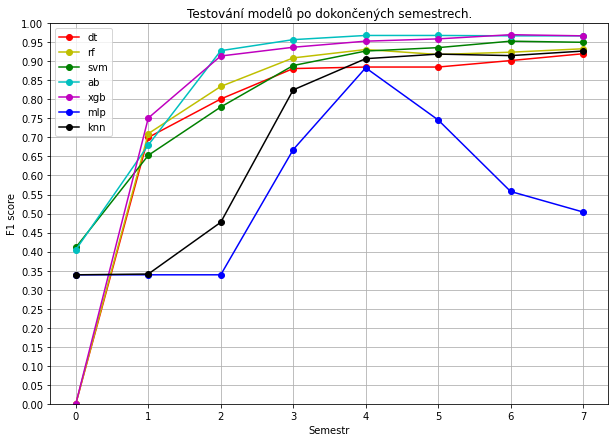

In [89]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean_f1['dt'].index
ydt = results_mean_f1['dt'].values

xrf = results_mean_f1['rf'].index
yrf = results_mean_f1['rf'].values

xsvm = results_mean_f1['svm'].index
ysvm = results_mean_f1['svm'].values

xab = results_mean_f1['ab'].index
yab = results_mean_f1['ab'].values

xxgb = results_mean_f1['xgb'].index
yxgb = results_mean_f1['xgb'].values

xmlp = results_mean_f1['mlp'].index
ymlp = results_mean_f1['mlp'].values

xknn = results_mean_f1['knn'].index
yknn = results_mean_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [86]:
results_mean_f1

dt     rf    svm     ab    xgb    mlp    knn
0      0      0  0.411  0.405      0  0.339  0.339
1    0.7   0.71  0.653   0.68  0.751  0.339  0.341
2  0.801  0.834   0.78  0.928  0.914  0.339  0.477
3  0.881  0.909  0.889  0.957  0.937  0.668  0.825
4  0.885  0.931  0.927  0.968  0.953  0.883  0.907
5  0.885  0.918  0.936  0.968  0.959  0.746  0.919
6  0.902  0.924  0.953  0.967   0.97  0.558  0.915
7   0.92  0.933   0.95  0.967  0.967  0.504  0.927